<h1 style='color:white;font-size:25px;font-weight:700;margin-top:30px'>Розвязування задачі на основі Pandas (первинна обробка)</h1>

In [15]:
import pandas as pd

<h2 style = 'color:#white;font-size:20px'>1. Імпорт даних та читання <b><i>csv</i></b> файлу </h2>

In [3]:
df = pd.read_csv('C:/Users/den/Desktop/pandas/pandas-learn/data/uberData.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

<h2 style = 'color:#white;font-size:20px'>2. Отримання результатів від числових даних (перевірка к-ті результатів)</h2>

In [4]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


<h2 style = 'color:#white;font-size:20px'>3. Пошук дублікатів у даних</h2>

In [6]:
df[df.duplicated()]

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method


<h2 style = 'color:#white;font-size:20px'>3. Пошук пустих значень та заповнення даними</h2>

In [ ]:
df.isna().sum() # знаходимо к-сть пустих значень в кожному рядку

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [13]:


df1 = df.dropna() #видаляє рядки де є пусті значення (поганий метод оскільки втрачаємо в даному випадку всі дані)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               0 non-null      object 
 1   Time                               0 non-null      object 
 2   Booking ID                         0 non-null      object 
 3   Booking Status                     0 non-null      object 
 4   Customer ID                        0 non-null      object 
 5   Vehicle Type                       0 non-null      object 
 6   Pickup Location                    0 non-null      object 
 7   Drop Location                      0 non-null      object 
 8   Avg VTAT                           0 non-null      float64
 9   Avg CTAT                           0 non-null      float64
 10  Cancelled Rides by Customer        0 non-null      float64
 11  Reason for cancelling by Customer  0 non-null      object 
 12  Cancelled R

In [ ]:
g =  10

df2 = df[df.isnull().sum(axis = 1) > g ] # отримуємо елементи які мають більше 10 null значень

df2

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2024-09-18,08:09:38,"""CNR9551927""",No Driver Found,"""CID7568143""",Auto,Vidhan Sabha,AIIMS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,2024-04-12,19:42:35,"""CNR4499383""",No Driver Found,"""CID5717521""",Premier Sedan,Sadar Bazar Gurgaon,Mehrauli,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,2024-04-11,15:43:34,"""CNR9773309""",No Driver Found,"""CID9965847""",Uber XL,Anand Vihar ISBT,Dwarka Sector 21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149954,2024-10-21,16:57:10,"""CNR1601556""",No Driver Found,"""CID4560179""",Premier Sedan,Ghitorni Village,Ashram,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149958,2024-04-06,19:03:36,"""CNR5009300""",No Driver Found,"""CID1068525""",Go Sedan,Pataudi Chowk,Ghitorni,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149980,2024-12-10,15:31:45,"""CNR6231822""",No Driver Found,"""CID6232718""",Premier Sedan,Kirti Nagar,Sarojini Nagar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149982,2024-11-13,06:51:19,"""CNR4448255""",No Driver Found,"""CID9138957""",Auto,Sikanderpur,Old Gurgaon,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3 = df[:]

df3['Ride Distance'].fillna(0) # заповнюємо числовим значенням в даному випадку 0

0          0.00
1          5.73
2         13.58
3         34.02
4         48.21
          ...  
149995    40.08
149996    21.31
149997    15.93
149998    45.54
149999    21.19
Name: Ride Distance, Length: 150000, dtype: float64

In [ ]:
df4= df[:]

df4['Ride Distance'].fillna(df4['Ride Distance'].median()) # заміняємо медіанним значення

0         23.72
1          5.73
2         13.58
3         34.02
4         48.21
          ...  
149995    40.08
149996    21.31
149997    15.93
149998    45.54
149999    21.19
Name: Ride Distance, Length: 150000, dtype: float64

<h1 style='color:white;font-size:25px;font-weight:700;margin-top:30px'>Matplotlib базові навички</h1>

In [5]:
import matplotlib

import matplotlib.pyplot as plt

import numpy as np

<h2 style = 'color:#white;font-size:20px'>1. Відображення найпростішої лінії</h2>

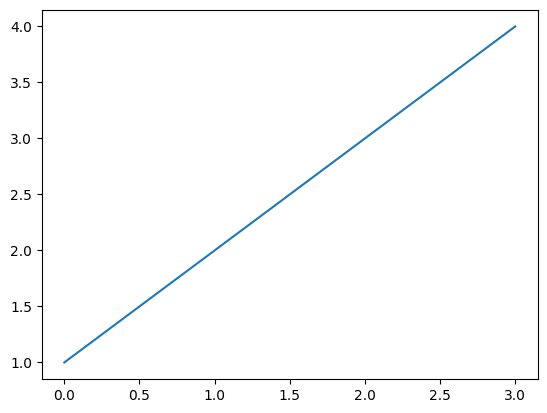

In [2]:
plt.plot([1,2,3,4])

plt.show()

<h2 style = 'color:#white;font-size:20px'>2. Лінійна діагарма plot</h2>

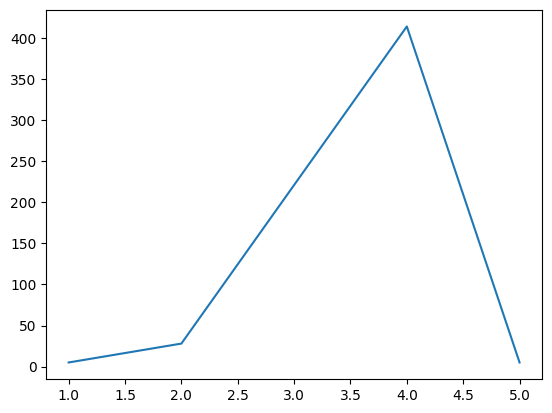

In [14]:
x = np.array([1,2,4,5])

y = np.array([5,28,414,5])

plt.plot(x,y)

plt.show()

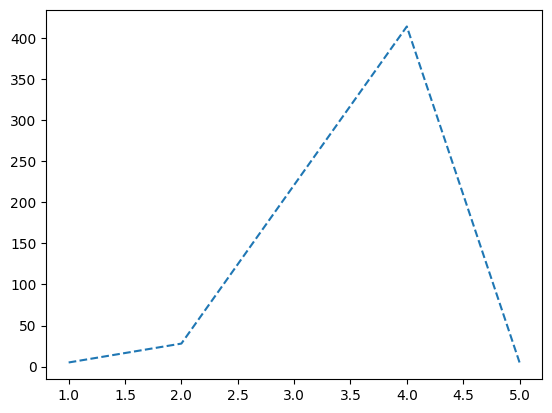

In [13]:
x = np.array([1,2,4,5])

y = np.array([5,28,414,5])

plt.plot(x,y,'--')

plt.show()


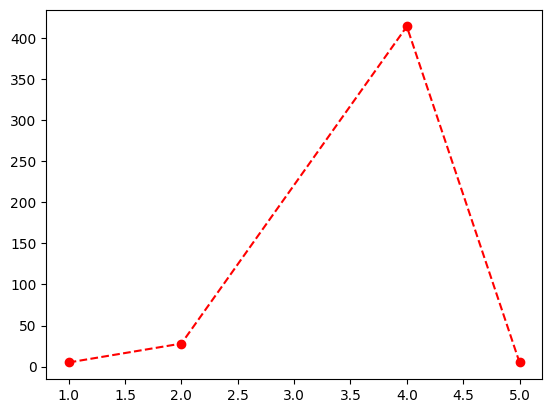

In [12]:
x = np.array([1,2,4,5])

y = np.array([5,28,414,5])

plt.plot(x,y,'r--o') # за допомогою такого коду можемо поставити колір, тип, маркери

plt.show()

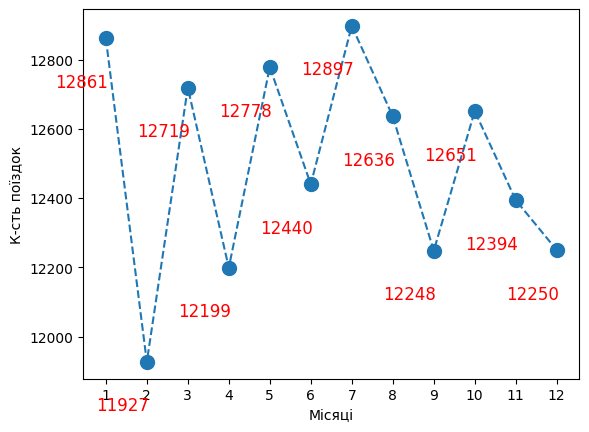

In [45]:
from matplotlib import markers
from matplotlib.lines import lineStyles


df = pd.read_csv('C:/Users/den/Desktop/pandas/pandas-learn/data/uberData.csv')

month = pd.to_datetime(df['Date']).dt.month.value_counts().sort_index()

for x, y in zip(month.index, month.values):
    plt.text(x-.6, y-100, str(y), ha='center', va='top', fontsize=12, color="r")

plt.plot(month.index,month.values,marker = 'o',linestyle = '--',markersize = 10)
plt.xticks(range(1,13))  # щоб були всі місяці від 1 до 12
plt.xlabel('Місяці')
plt.ylabel('К-сть поїздок')

plt.show()


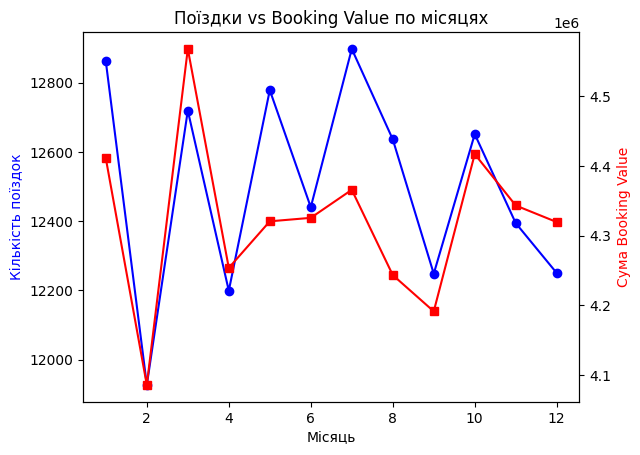

In [53]:
df = pd.read_csv('C:/Users/den/Desktop/pandas/pandas-learn/data/uberData.csv')

df["Month"] = pd.to_datetime(df['Date']).dt.month

x1 = df['Month'].value_counts().sort_index()

x2 = df.groupby('Month')['Booking Value'].sum()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  # друга вісь Y

ax1.plot(x1.index, x1.values, color='blue', marker='o', label="Кількість поїздок")
ax2.plot(x2.index, x2.values, color='red', marker='s', label="Сума Booking Value")

ax1.set_xlabel("Місяць")
ax1.set_ylabel("Кількість поїздок", color='blue')
ax2.set_ylabel("Сума Booking Value", color='red')

plt.title("Поїздки vs Booking Value по місяцях")
plt.show()

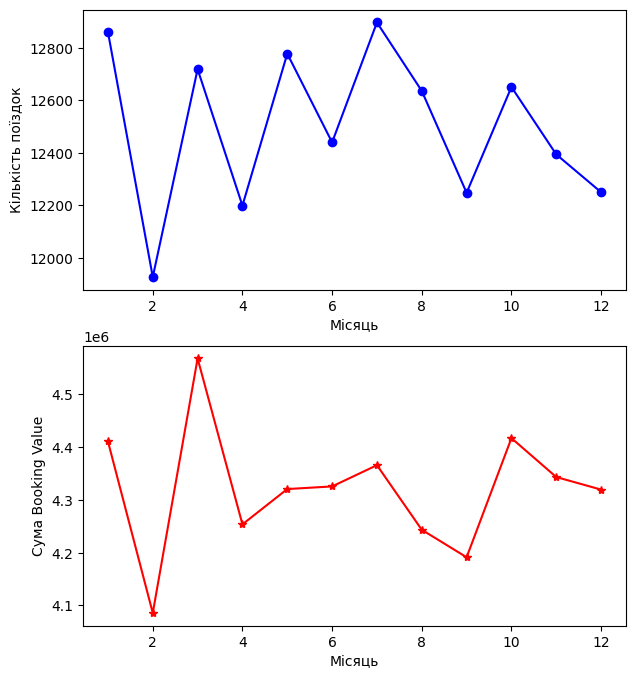

In [72]:
f,ax = plt.subplots(2,1,figsize=(7,8))

ax[0].plot(x1.index, x1.values, color='blue', marker='o', label="Кількість поїздок")
ax[1].plot(x2.index, x2.values, color='red', marker='*')

ax[0].set_ylabel("Кількість поїздок")
ax[0].set_xlabel("Місяць")

ax[1].set_ylabel("Сума Booking Value")
ax[1].set_xlabel("Місяць")

plt.show()

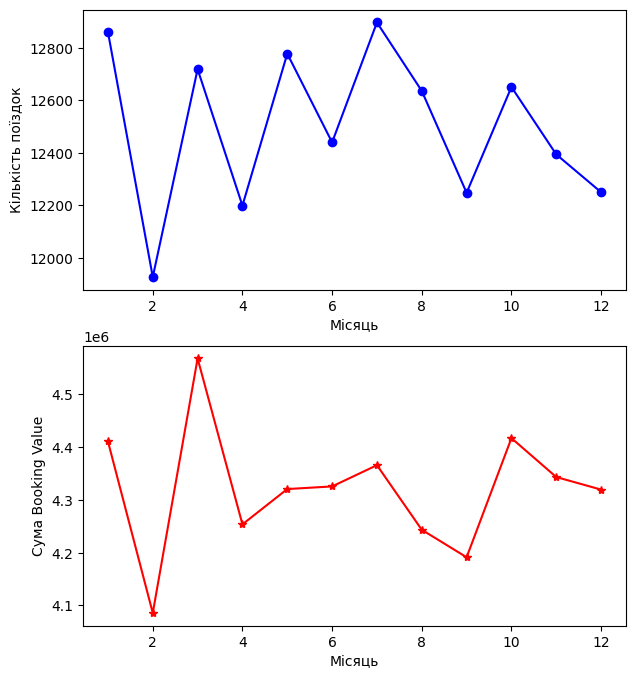

In [84]:
plt.figure(figsize=(7,8))  # задаємо розмір фігури

plt.subplot(2,1,1)
plt.plot(x1.index, x1.values, color='blue', marker='o', label="Кількість поїздок")
plt.xlabel("Місяць")
plt.ylabel("Кількість поїздок")

plt.subplot(2,1,2)
plt.plot(x2.index, x2.values, color='red', marker='*', label="Кількість поїздок")
plt.xlabel("Місяць")
plt.ylabel("Сума Booking Value")

plt.show()
